## Rotations
A few example of SO(3) and SU(2)
### SO(3) Euler angles

In [1]:
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False)
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy import *
alpha, theta, phi = symbols('𝛼 𝜃 𝜑', positive=True, real=True)
R_alpha =  Matrix([[1,0,0], [0, cos(alpha), sin(alpha)], [0, -sin(alpha), cos(alpha)]])
R_theta =  Matrix([[cos(theta),0, -sin(theta)], [0,1,0], [sin(theta),0,cos(theta)]])
R_phi = Matrix([[cos(phi),sin(phi),0], [-sin(phi),cos(phi),0], [0,0,1]])
R = R_phi * R_theta * R_alpha

In [2]:
R_alpha

[1     0       0   ]
[                  ]
[0  cos(𝛼)   sin(𝛼)]
[                  ]
[0  -sin(𝛼)  cos(𝛼)]

In [3]:
R_theta

[cos(𝜃)  0  -sin(𝜃)]
[                  ]
[  0     1     0   ]
[                  ]
[sin(𝜃)  0  cos(𝜃) ]

In [4]:
R_phi

[cos(𝜑)   sin(𝜑)  0]
[                  ]
[-sin(𝜑)  cos(𝜑)  0]
[                  ]
[   0       0     1]

In [5]:
R

[cos(𝜃)*cos(𝜑)   sin(𝛼)*sin(𝜃)*cos(𝜑) + sin(𝜑)*cos(𝛼)   sin(𝛼)*sin(𝜑) - sin(𝜃)*cos(𝛼)*cos(𝜑)]
[                                                                                           ]
[-sin(𝜑)*cos(𝜃)  -sin(𝛼)*sin(𝜃)*sin(𝜑) + cos(𝛼)*cos(𝜑)  sin(𝛼)*cos(𝜑) + sin(𝜃)*sin(𝜑)*cos(𝛼)]
[                                                                                           ]
[    sin(𝜃)                 -sin(𝛼)*cos(𝜃)                         cos(𝛼)*cos(𝜃)            ]

### SU(2) and quaternions


In [6]:
# a, b, c, d = symbols('a b c d', real=True)
id = Matrix([[1,0],[0,1]])
i = Matrix([[I, 0], [0, -I]])
j = Matrix([[0, 1], [-1, 0]])
k = Matrix([[0, I], [I, 0]])
b = sin(alpha/2)
c = sin(theta/2)
d = sin(phi/2)
a = sqrt(1 - b**2 - c**2 - d**2 )
U = id * a + i * b + j * c + k * d

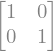

In [7]:
id

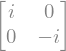

In [8]:
i

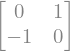

In [9]:
j

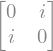

In [10]:
k

In [11]:
U

[    ___________________________________                                                               ]
[   /      2/𝛼\      2/𝜃\      2/𝜑\             /𝛼\                     /𝜃\        /𝜑\                 ]
[  /  - sin |-| - sin |-| - sin |-| + 1  + I*sin|-|                  sin|-| + I*sin|-|                 ]
[\/         \2/       \2/       \2/             \2/                     \2/        \2/                 ]
[                                                                                                      ]
[                                                        ___________________________________           ]
[                    /𝜃\        /𝜑\                     /      2/𝛼\      2/𝜃\      2/𝜑\             /𝛼\]
[               - sin|-| + I*sin|-|                    /  - sin |-| - sin |-| - sin |-| + 1  - I*sin|-|]
[                    \2/        \2/                  \/         \2/       \2/       \2/             \2/]

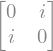

In [12]:
i * j

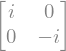

In [13]:
j * k

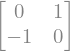

In [14]:
k * i

## Properties of quaternions

In [15]:
det(id * a + i * b + j * c + k * d)


In [16]:
x, y, z, x1, y1, z1 = symbols('x y z x_1 y_1 z_1' , real=True)
X = Matrix([[x, y + I*z],[y - I*z, -x]])
X1= Matrix([[x1, y1 + I*z1],[y1 - I*z1, -x1]])

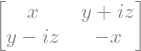

In [17]:
X

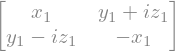

In [18]:
X1

In [19]:
simplify(trace(X * X1)/2)


In [20]:
Y = U * X * U.inv()
Y1 = U * X1 * U.inv()

In [21]:
Y


[  /  /    ___________________________________           \                                \                                                                                                                                                                                                                                                                                                                                                                                                                   ]
[  |  |   /      2/𝛼\      2/𝜃\      2/𝜑\             /𝛼\|             /   /𝜃\        /𝜑\\| /     2/𝜃\      2/𝜑\    \                                                                                                                                                                                                                                                                                                                                                                                         ]
[  |x*| 

In [22]:
simplify(trace(Y * Y1)/2)


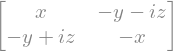

In [23]:
Y.subs({alpha:pi, theta:0, phi:0})

While this is not true in general we can assume here that sqrt(cos(alpha/2)**2) = cos(alpha/2) as we can choose without
loss of generality that alpha is between -pi/2 and pi/2. Therefore we substitute manually the expression to not encounter
absolute values and unnecessarely complex expressions

In [24]:
simplify(Y.subs({theta:0, phi:0}).subs(sqrt(1 - sin(alpha/2)**2), cos(alpha/2)))

[                            I*𝛼]
[       x         (y + I*z)*e   ]
[                               ]
[           -I*𝛼                ]
[(y - I*z)*e            -x      ]

In [25]:
simplify(simplify(Y.subs({alpha:0, phi:0})
                  .subs(sqrt(1 - sin(theta/2)**2), cos(theta/2)))
         .subs(- 2 * sin(theta/2)**2, cos(theta) - 1)
         .subs(2 * cos(theta/2)**2, cos(theta) + 1))


[   x*cos(𝜃) + y*sin(𝜃)      -x*sin(𝜃) + y*cos(𝜃) + I*z]
[                                                      ]
[-x*sin(𝜃) + y*cos(𝜃) - I*z     -x*cos(𝜃) - y*sin(𝜃)   ]

In [26]:
simplify(simplify(Y.subs({alpha:0, theta:0})
                  .subs(sqrt(1 - sin(phi/2)**2), cos(phi/2)))
         .subs(- 2 * sin(phi/2)**2, cos(phi) - 1)
         .subs(2 * cos(phi/2)**2, cos(phi) + 1))


[    x*cos(𝜑) + z*sin(𝜑)      -I*x*sin(𝜑) + y + I*z*cos(𝜑)]
[                                                         ]
[I*x*sin(𝜑) + y - I*z*cos(𝜑)      -x*cos(𝜑) - z*sin(𝜑)    ]

## SU(2) -> SO(3) Kernel
if we set alpha to pi and then square we would expect to get the identity matrix.
Instead we get -I. This still acts as the identity when applied to R**3. In general we can change a sign in the quaternion and we still get the same rotation.
This choice of sign is implicitly done in the square root above when we set a to be positive.

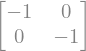

In [27]:
U.subs({alpha:pi, theta:0, phi:0}) ** 2

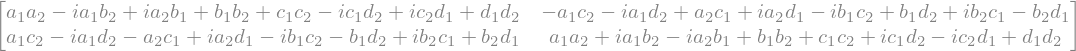

In [31]:
a1, b1, c1, d1, a2, b2, c2, d2 = symbols('a_1 b_1 c_1 d_1 a_2 b_2 c_2 d_2', real=True)

expand((a1*id + b1*i + c1*j + d1*k)*(a2*id - b2*i - c2*j - d2*k))